In [28]:
import numpy as np  
from matplotlib import pyplot as plt  
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random
import torch
import torch.nn.functional as nn
import torch.autograd as autograd
from torch import optim
from torch.autograd import Variable
import torch.nn.functional as F
import os
import matplotlib.gridspec as gridspec
import os
from tqdm import tqdm
%matplotlib inline 

In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
from AE_ts_model import Model, open_data, plot_data, plot_z_run
import data_utils

In [31]:
direc = '~/Desktop/exercise/AE_ts/UCR_TS_Archive_2015'
LOG_DIR = "~/Desktop/exercise/AE_ts/UCR_TS_Archive_2015"
X_train, X_val, y_train, y_val = open_data('./UCR_TS_Archive_2015')



In [62]:
# system parameters
n_epochs = 500
batch_size = 20
lr = 0.001 # adam:learning rate
b1 = 0.9 # adam: decay of first order momentum of gradient
b2 = 0.999 # adam: decay of first order momentum of gradient
img_size = 28 # size of each image dimension
channels = 1 # number of image channels

alpha= 10
Dim = 40
p_miss = 0.5
p_hint = 0.9
data_loader = data_utils.DataLoader(data=X_train,batch_size=batch_size, num_steps=Dim)

cuda = True if torch.cuda.is_available() else False
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

In [63]:
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / np.sqrt(in_dim / 2.)
    return Variable(torch.randn(*size) * xavier_stddev, requires_grad=True)

In [64]:
""" ==================== DISCRIMINATOR ======================== """
D_W1 = xavier_init(size = [Dim*2, 32])     # Data + Hint as inputs
D_b1 = Variable(torch.zeros(32),requires_grad=True)

# D_W2 = xavier_init(size = [64, 32])
# D_b2 = Variable(torch.zeros(32),requires_grad=True)

D_W3 = xavier_init(size = [32, Dim])
D_b3 = Variable(torch.zeros(Dim),requires_grad=True)  

def discriminator(x, m, g, h):
    inp = m * x + (1-m) * g  # Replace missing values to the imputed values
    inputs = torch.cat([inp,h],1)  # Hint + Data Concatenate
    D_h1 = nn.relu(torch.matmul(inputs, D_W1) + D_b1)
   # D_h2 = nn.relu(torch.matmul(D_h1, D_W2) + D_b2)
    D_logit = torch.matmul(D_h1, D_W3) + D_b3
    D_prob = nn.sigmoid(D_logit)  # [0,1] Probability Output
    
    return D_prob

In [65]:
""" ==================== GENERATOR ======================== """
G_W1 = xavier_init(size = [Dim*2, 32])    # Data + Mask as inputs (Random Noises are in Missing Components)
G_b1 = Variable(torch.zeros(32),requires_grad=True)

# G_W2 = xavier_init(size = [64, 32])
# G_b2 = Variable(torch.zeros(32),requires_grad=True)

G_W3 = xavier_init(size = [32, Dim])
G_b3 = Variable(torch.zeros(Dim),requires_grad=True)

def generator(x,z,m):
    inp = m * x + (1-m) * z  # Fill in random noise on the missing values
    inputs = torch.cat([inp,m],1)  # Mask + Data Concatenate
    G_h1 = nn.relu(torch.matmul(inputs, G_W1) + G_b1)
   # G_h2 = nn.relu(torch.matmul(G_h1, G_W2) + G_b2)
    G_prob = nn.sigmoid(torch.matmul(G_h1, G_W3) + G_b3) # [0,1] normalized Output
    
    return G_prob

In [66]:
G_params = [G_W1, G_W3, G_b1, G_b3]
D_params = [D_W1, D_W3, D_b1, D_b3]
params = G_params + D_params


  0%|          | 0/1000 [00:00<?, ?it/s]

Iter: 0
Train_loss: 0.1335
Test_loss: 0.1332



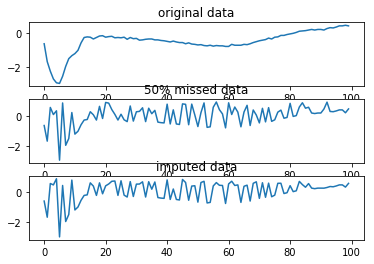


  0%|          | 1/1000 [00:00<08:42,  1.91it/s]

Iter: 10
Train_loss: 0.1068
Test_loss: 0.1115



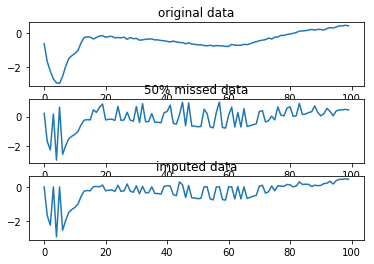


  1%|          | 11/1000 [00:01<01:33, 10.60it/s]

Iter: 20
Train_loss: 0.06428
Test_loss: 0.07409



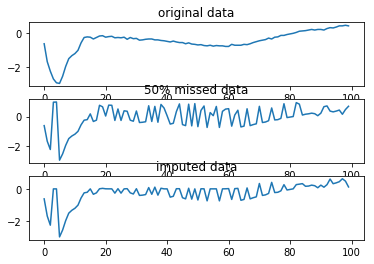


  2%|▏         | 21/1000 [00:01<01:18, 12.50it/s]

Iter: 30
Train_loss: 0.05866
Test_loss: 0.05061



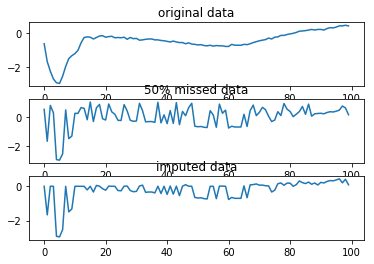


  3%|▎         | 31/1000 [00:02<01:12, 13.38it/s]

Iter: 40
Train_loss: 0.04909
Test_loss: 0.05397



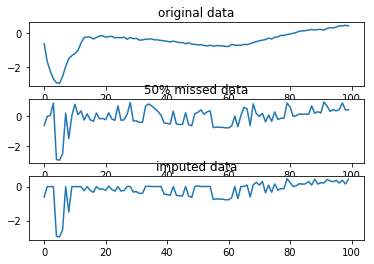


  4%|▍         | 41/1000 [00:02<01:09, 13.85it/s]

Iter: 50
Train_loss: 0.0423
Test_loss: 0.05119



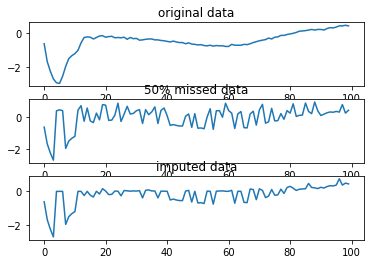


  5%|▌         | 51/1000 [00:03<01:04, 14.68it/s]

Iter: 60
Train_loss: 0.04459
Test_loss: 0.04457



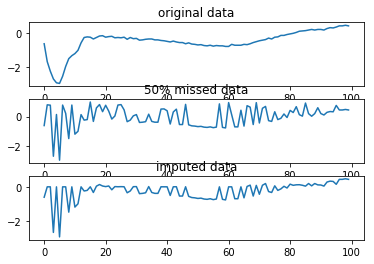


  6%|▌         | 61/1000 [00:04<01:02, 15.08it/s]

Iter: 70
Train_loss: 0.04476
Test_loss: 0.05418



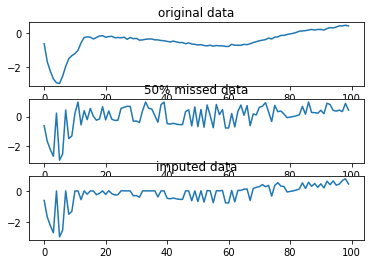


  7%|▋         | 71/1000 [00:04<01:01, 15.02it/s]

Iter: 80
Train_loss: 0.04448
Test_loss: 0.04048



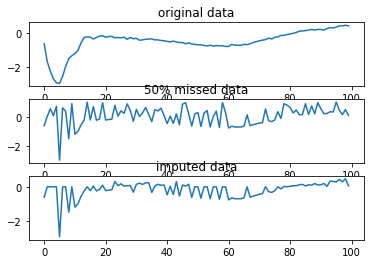


  8%|▊         | 81/1000 [00:05<01:00, 15.09it/s]

Iter: 90
Train_loss: 0.03822
Test_loss: 0.04082



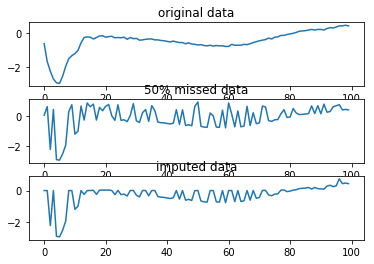


  9%|▉         | 91/1000 [00:05<00:58, 15.49it/s]

Iter: 100
Train_loss: 0.03779
Test_loss: 0.03837



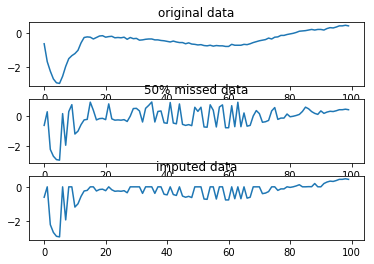


 10%|█         | 101/1000 [00:06<00:58, 15.33it/s]

Iter: 110
Train_loss: 0.03819
Test_loss: 0.04389



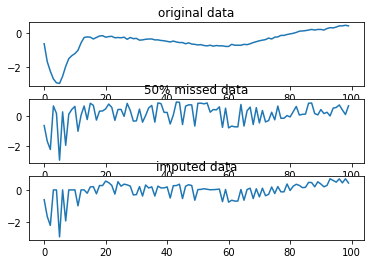


 11%|█         | 111/1000 [00:07<00:57, 15.46it/s]

Iter: 120
Train_loss: 0.03988
Test_loss: 0.03946



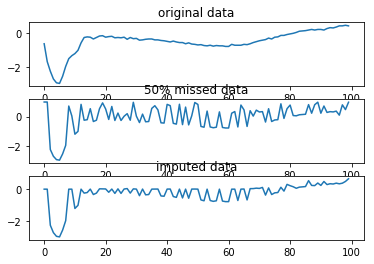


 12%|█▏        | 121/1000 [00:07<00:56, 15.43it/s]

Iter: 130
Train_loss: 0.03618
Test_loss: 0.04163



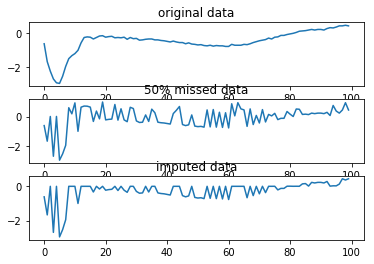


 13%|█▎        | 131/1000 [00:08<00:55, 15.67it/s]

Iter: 140
Train_loss: 0.0392
Test_loss: 0.0368



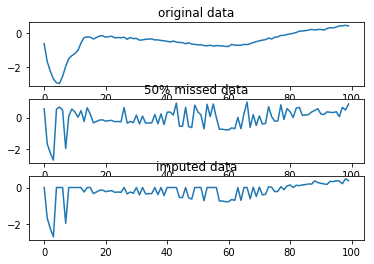


 14%|█▍        | 141/1000 [00:09<00:55, 15.37it/s]

Iter: 150
Train_loss: 0.0373
Test_loss: 0.0425



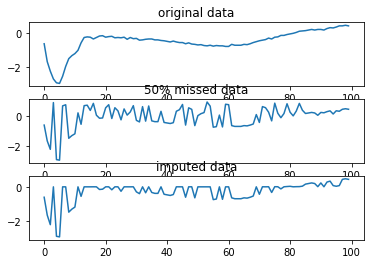


 15%|█▌        | 151/1000 [00:09<00:54, 15.62it/s]

Iter: 160
Train_loss: 0.03683
Test_loss: 0.036



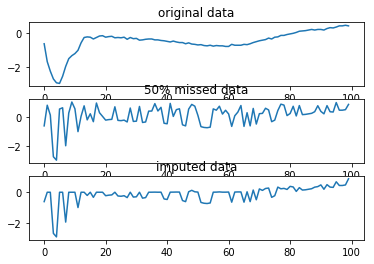


 16%|█▌        | 161/1000 [00:10<00:53, 15.56it/s]

Iter: 170
Train_loss: 0.03369
Test_loss: 0.03571



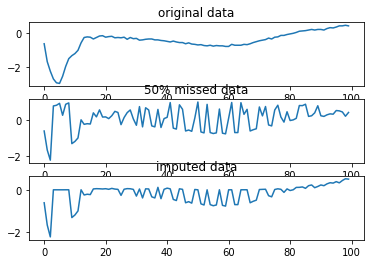


 17%|█▋        | 171/1000 [00:10<00:52, 15.70it/s]

Iter: 180
Train_loss: 0.0303
Test_loss: 0.03792



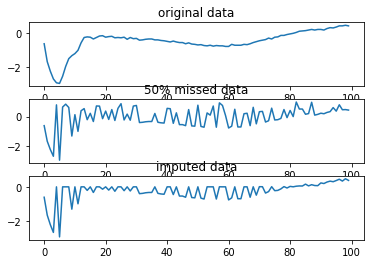


 18%|█▊        | 181/1000 [00:11<00:51, 15.81it/s]

Iter: 190
Train_loss: 0.03504
Test_loss: 0.03433



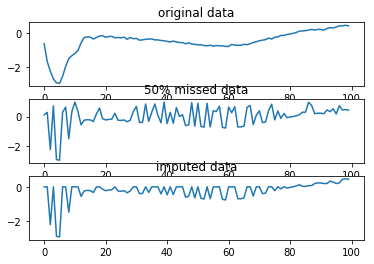


 19%|█▉        | 191/1000 [00:12<00:50, 15.88it/s]

Iter: 200
Train_loss: 0.03377
Test_loss: 0.04426



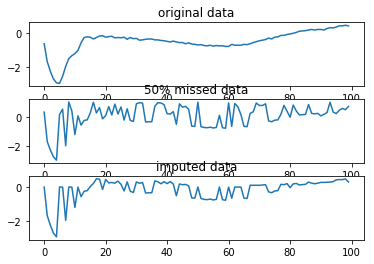


 20%|██        | 201/1000 [00:12<00:51, 15.63it/s]

Iter: 210
Train_loss: 0.04063
Test_loss: 0.03528



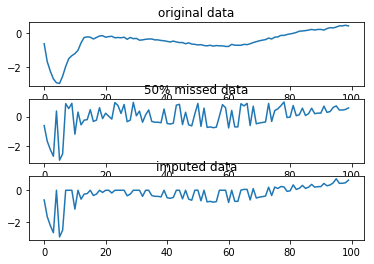


 21%|██        | 211/1000 [00:13<00:50, 15.76it/s]

Iter: 220
Train_loss: 0.03046
Test_loss: 0.04492



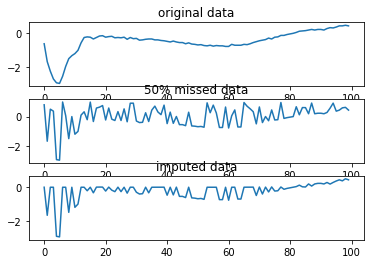


 22%|██▏       | 221/1000 [00:14<00:49, 15.70it/s]

Iter: 230
Train_loss: 0.03375
Test_loss: 0.0489



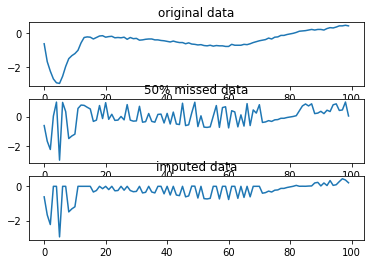


 23%|██▎       | 231/1000 [00:14<00:48, 15.83it/s]

Iter: 240
Train_loss: 0.03422
Test_loss: 0.03897



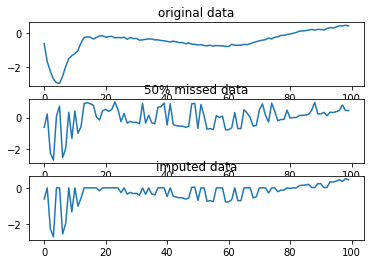


 24%|██▍       | 241/1000 [00:15<00:47, 15.91it/s]

Iter: 250
Train_loss: 0.03166
Test_loss: 0.0337



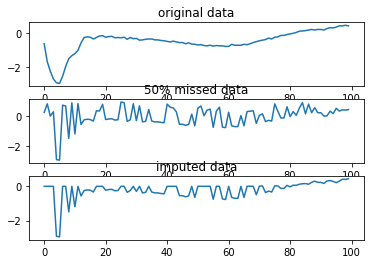


 25%|██▌       | 251/1000 [00:15<00:47, 15.80it/s]

Iter: 260
Train_loss: 0.03723
Test_loss: 0.03779



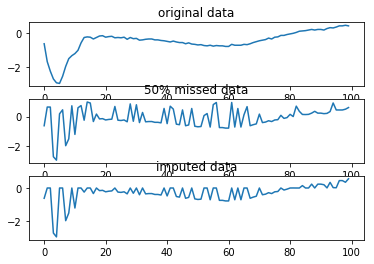


 26%|██▌       | 261/1000 [00:16<00:46, 15.81it/s]

Iter: 270
Train_loss: 0.03589
Test_loss: 0.04034



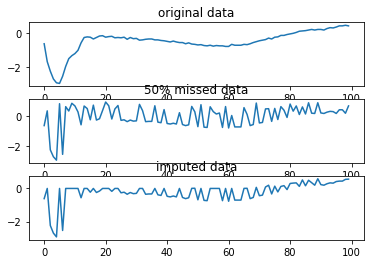


 27%|██▋       | 271/1000 [00:17<00:45, 15.88it/s]

Iter: 280
Train_loss: 0.03918
Test_loss: 0.03804



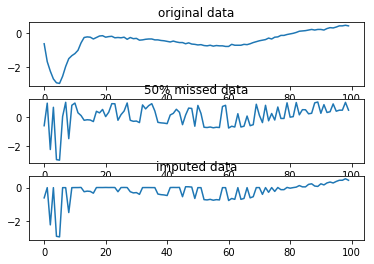


 28%|██▊       | 281/1000 [00:17<00:45, 15.81it/s]

Iter: 290
Train_loss: 0.03232
Test_loss: 0.03816



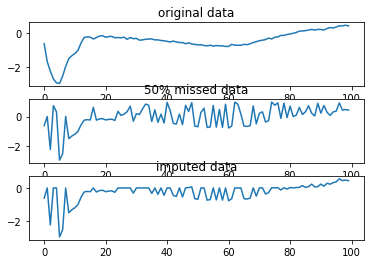


 29%|██▉       | 291/1000 [00:18<00:44, 15.91it/s]

Iter: 300
Train_loss: 0.03677
Test_loss: 0.03706



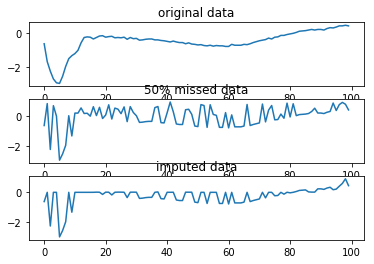


 30%|███       | 301/1000 [00:18<00:43, 15.98it/s]

Iter: 310
Train_loss: 0.02797
Test_loss: 0.04028



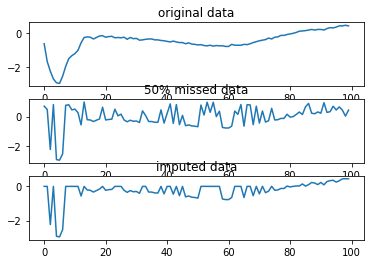


 31%|███       | 311/1000 [00:19<00:43, 15.98it/s]

Iter: 320
Train_loss: 0.03244
Test_loss: 0.04481



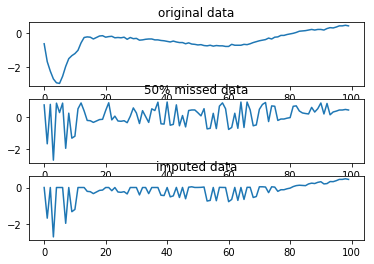


 32%|███▏      | 321/1000 [00:19<00:42, 16.07it/s]

Iter: 330
Train_loss: 0.03358
Test_loss: 0.0371



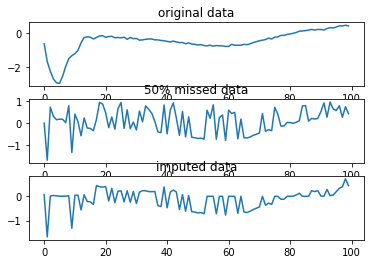


 33%|███▎      | 331/1000 [00:20<00:41, 16.06it/s]

Iter: 340
Train_loss: 0.03661
Test_loss: 0.03839



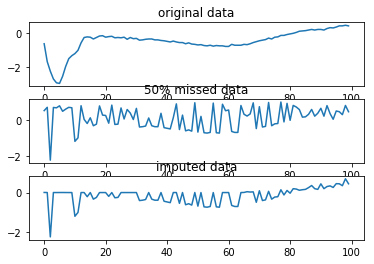


 34%|███▍      | 341/1000 [00:21<00:40, 16.09it/s]

Iter: 350
Train_loss: 0.0338
Test_loss: 0.03677



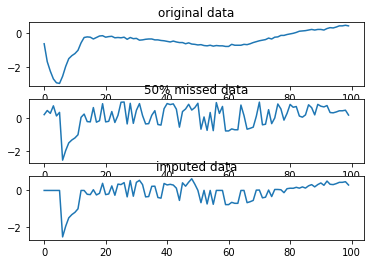


 35%|███▌      | 351/1000 [00:21<00:40, 16.15it/s]

Iter: 360
Train_loss: 0.02858
Test_loss: 0.03773



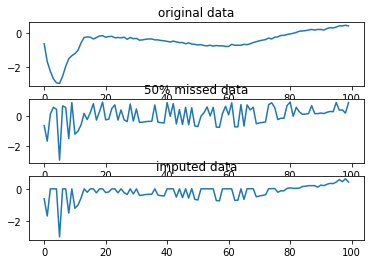


 36%|███▌      | 361/1000 [00:22<00:39, 16.12it/s]

Iter: 370
Train_loss: 0.0366
Test_loss: 0.03735



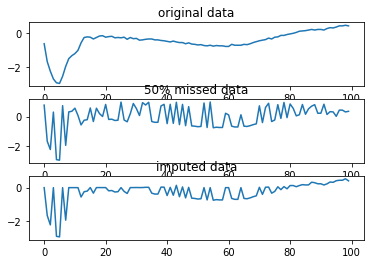


 37%|███▋      | 371/1000 [00:22<00:38, 16.18it/s]

Iter: 380
Train_loss: 0.03289
Test_loss: 0.04043



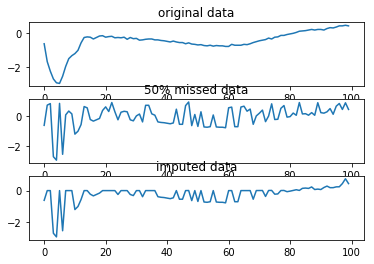


 38%|███▊      | 381/1000 [00:23<00:38, 16.19it/s]

Iter: 390
Train_loss: 0.03534
Test_loss: 0.03844



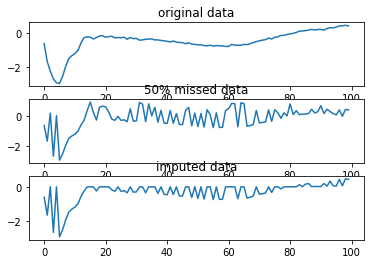


 39%|███▉      | 391/1000 [00:24<00:37, 16.26it/s]

Iter: 400
Train_loss: 0.03523
Test_loss: 0.04125



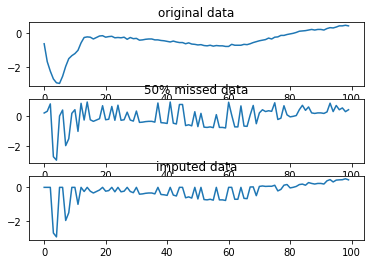


 40%|████      | 401/1000 [00:24<00:36, 16.26it/s]

Iter: 410
Train_loss: 0.03134
Test_loss: 0.03076



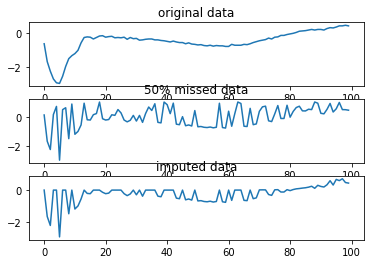


 41%|████      | 411/1000 [00:25<00:36, 16.32it/s]

Iter: 420
Train_loss: 0.0294
Test_loss: 0.04669



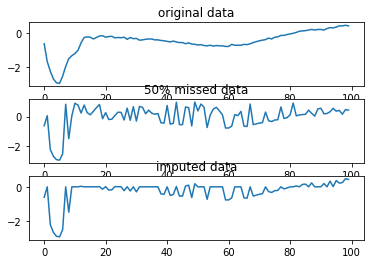


 42%|████▏     | 421/1000 [00:25<00:35, 16.33it/s]

Iter: 430
Train_loss: 0.03274
Test_loss: 0.03858



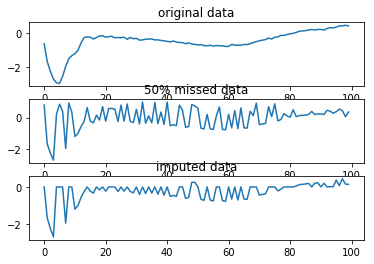


 43%|████▎     | 431/1000 [00:26<00:34, 16.39it/s]

Iter: 440
Train_loss: 0.02891
Test_loss: 0.03997



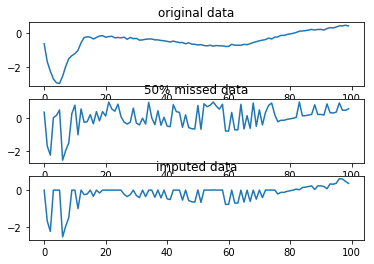


 44%|████▍     | 441/1000 [00:27<00:34, 16.33it/s]

Iter: 450
Train_loss: 0.03475
Test_loss: 0.0439



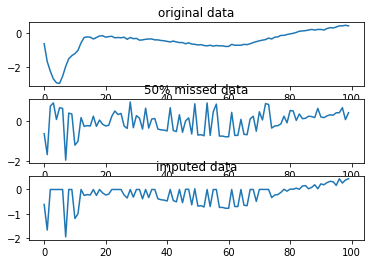


 45%|████▌     | 451/1000 [00:27<00:33, 16.31it/s]

Iter: 460
Train_loss: 0.02868
Test_loss: 0.03632



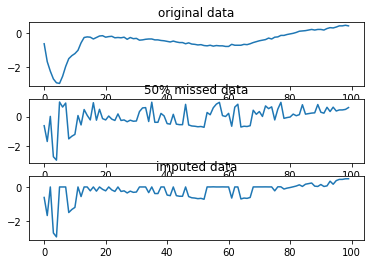


 46%|████▌     | 461/1000 [00:28<00:32, 16.38it/s]

Iter: 470
Train_loss: 0.03359
Test_loss: 0.0375



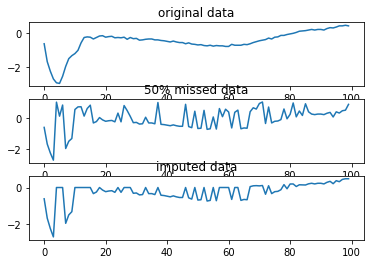


 47%|████▋     | 471/1000 [00:28<00:32, 16.41it/s]

Iter: 480
Train_loss: 0.03513
Test_loss: 0.0277



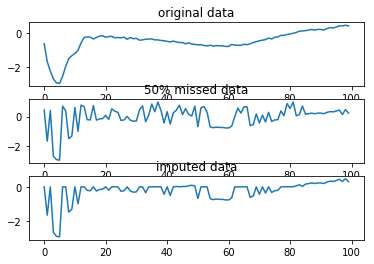


 48%|████▊     | 481/1000 [00:29<00:31, 16.42it/s]

Iter: 490
Train_loss: 0.03479
Test_loss: 0.03711



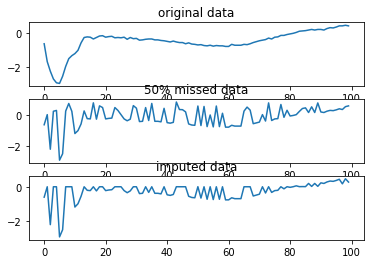


 49%|████▉     | 491/1000 [00:29<00:30, 16.47it/s]

Iter: 500
Train_loss: 0.03952
Test_loss: 0.0312



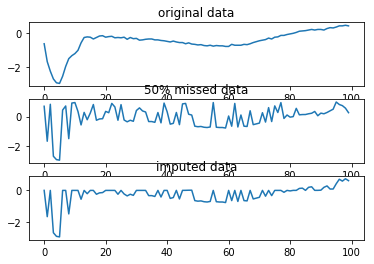


 50%|█████     | 501/1000 [00:30<00:30, 16.51it/s]

Iter: 510
Train_loss: 0.02507
Test_loss: 0.04672



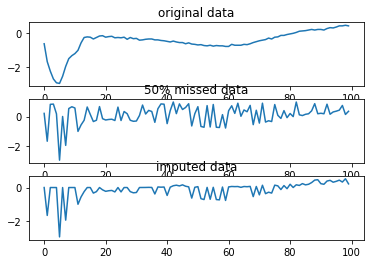


 51%|█████     | 511/1000 [00:30<00:29, 16.52it/s]

Iter: 520
Train_loss: 0.03634
Test_loss: 0.0463



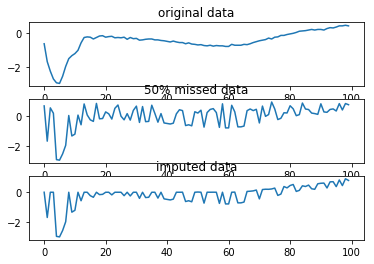


 52%|█████▏    | 521/1000 [00:32<00:29, 16.26it/s]

Iter: 530
Train_loss: 0.02925
Test_loss: 0.03799



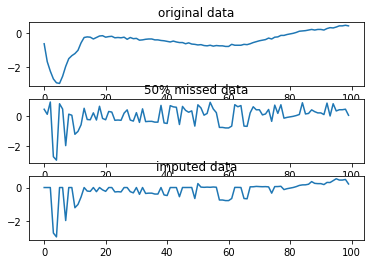


 53%|█████▎    | 531/1000 [00:32<00:28, 16.27it/s]

Iter: 540
Train_loss: 0.03453
Test_loss: 0.03406



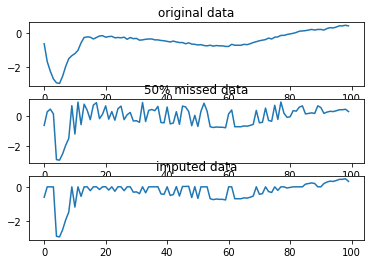


 54%|█████▍    | 541/1000 [00:33<00:28, 16.29it/s]

Iter: 550
Train_loss: 0.03095
Test_loss: 0.03823



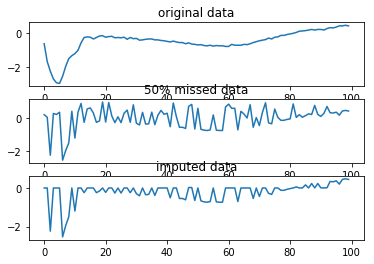


 55%|█████▌    | 551/1000 [00:33<00:27, 16.34it/s]

Iter: 560
Train_loss: 0.03031
Test_loss: 0.04193



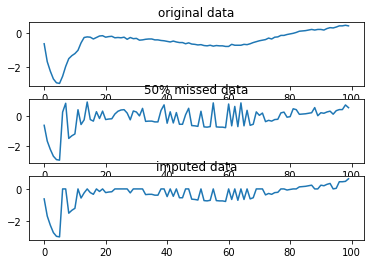


 56%|█████▌    | 561/1000 [00:34<00:26, 16.30it/s]

Iter: 570
Train_loss: 0.03246
Test_loss: 0.03716



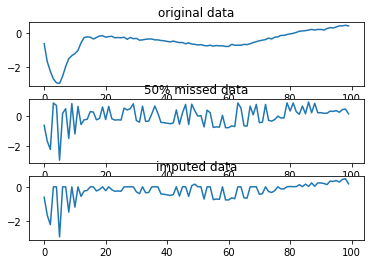


 57%|█████▋    | 571/1000 [00:35<00:26, 16.31it/s]

Iter: 580
Train_loss: 0.02761
Test_loss: 0.05555



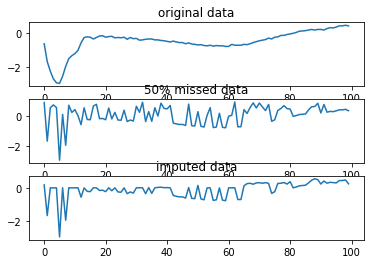


 58%|█████▊    | 581/1000 [00:35<00:25, 16.36it/s]

Iter: 590
Train_loss: 0.02831
Test_loss: 0.03777



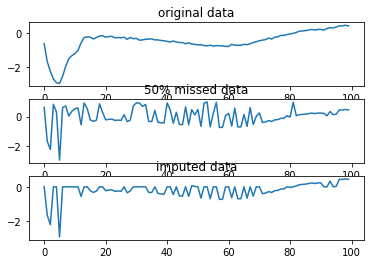


 59%|█████▉    | 591/1000 [00:36<00:24, 16.39it/s]

Iter: 600
Train_loss: 0.03089
Test_loss: 0.04222



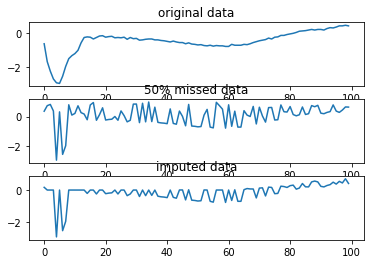


 60%|██████    | 601/1000 [00:36<00:24, 16.40it/s]

Iter: 610
Train_loss: 0.0334
Test_loss: 0.03793



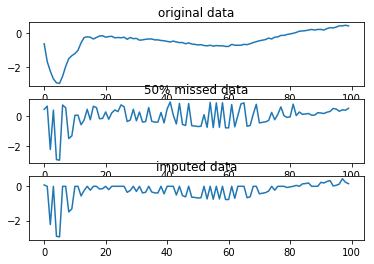


 61%|██████    | 611/1000 [00:37<00:23, 16.39it/s]

Iter: 620
Train_loss: 0.03341
Test_loss: 0.03855



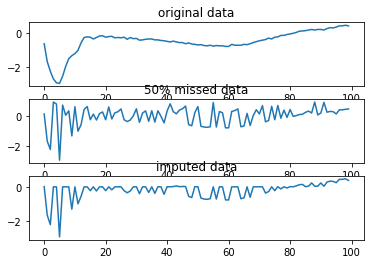


 62%|██████▏   | 621/1000 [00:37<00:23, 16.40it/s]

Iter: 630
Train_loss: 0.02935
Test_loss: 0.04628



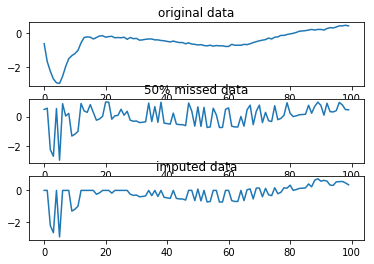


 63%|██████▎   | 631/1000 [00:38<00:22, 16.41it/s]

Iter: 640
Train_loss: 0.02842
Test_loss: 0.04423



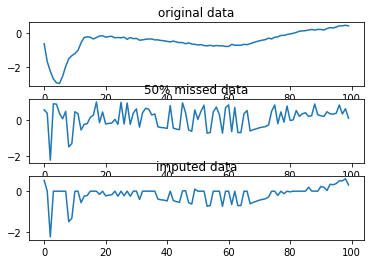


 64%|██████▍   | 641/1000 [00:38<00:21, 16.44it/s]

Iter: 650
Train_loss: 0.02928
Test_loss: 0.03748



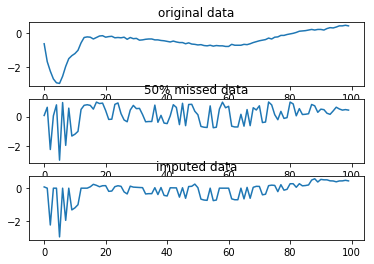


 65%|██████▌   | 651/1000 [00:39<00:21, 16.45it/s]

Iter: 660
Train_loss: 0.03401
Test_loss: 0.03831



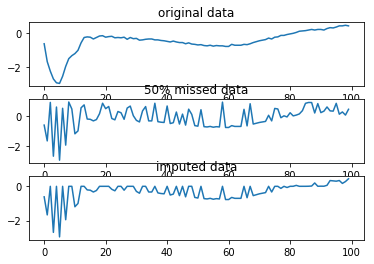


 66%|██████▌   | 661/1000 [00:40<00:20, 16.45it/s]

Iter: 670
Train_loss: 0.03139
Test_loss: 0.03409



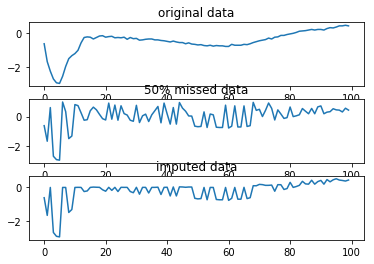


 67%|██████▋   | 671/1000 [00:40<00:19, 16.49it/s]

Iter: 680
Train_loss: 0.03255
Test_loss: 0.03678



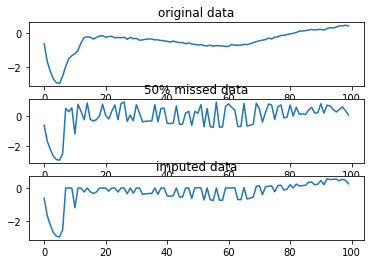


 68%|██████▊   | 681/1000 [00:41<00:19, 16.46it/s]

Iter: 690
Train_loss: 0.03404
Test_loss: 0.0386



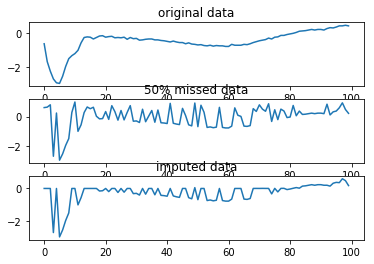


 69%|██████▉   | 691/1000 [00:41<00:18, 16.46it/s]

Iter: 700
Train_loss: 0.03361
Test_loss: 0.03848



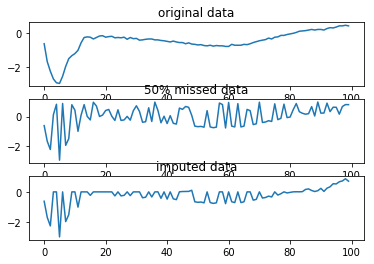


 70%|███████   | 701/1000 [00:42<00:18, 16.47it/s]

Iter: 710
Train_loss: 0.02816
Test_loss: 0.04142



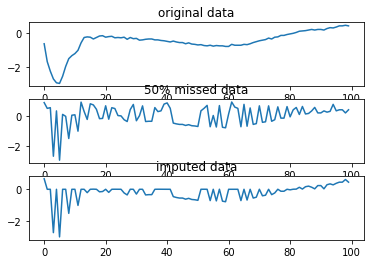


 71%|███████   | 711/1000 [00:43<00:17, 16.50it/s]

Iter: 720
Train_loss: 0.03262
Test_loss: 0.03925



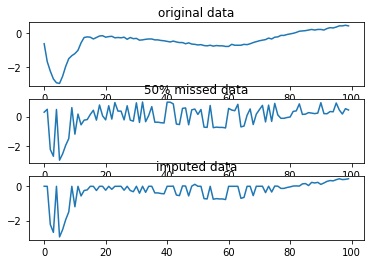


 72%|███████▏  | 721/1000 [00:43<00:16, 16.50it/s]

Iter: 730
Train_loss: 0.02928
Test_loss: 0.03879



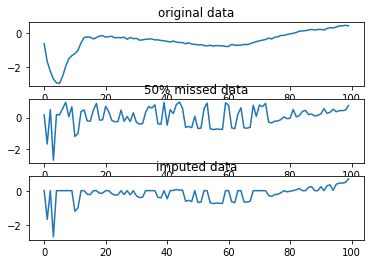


 73%|███████▎  | 731/1000 [00:44<00:16, 16.54it/s]

Iter: 740
Train_loss: 0.03354
Test_loss: 0.03647



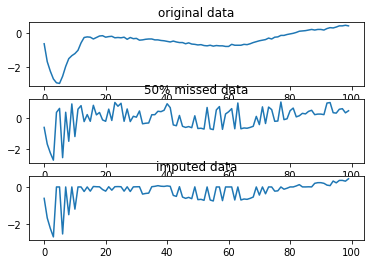


 74%|███████▍  | 741/1000 [00:44<00:15, 16.54it/s]

Iter: 750
Train_loss: 0.02892
Test_loss: 0.04118



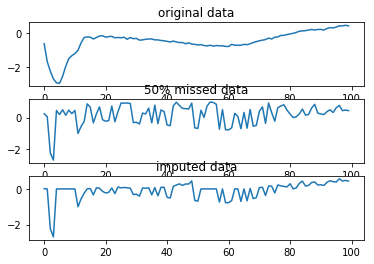


 75%|███████▌  | 751/1000 [00:45<00:15, 16.55it/s]

Iter: 760
Train_loss: 0.03357
Test_loss: 0.03955



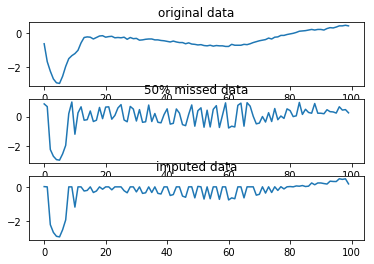


 76%|███████▌  | 761/1000 [00:46<00:14, 16.54it/s]

Iter: 770
Train_loss: 0.03018
Test_loss: 0.03689



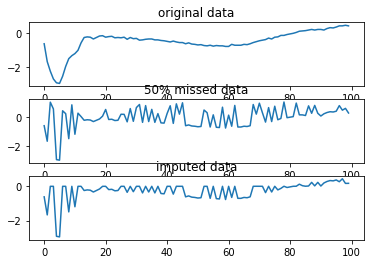


 77%|███████▋  | 771/1000 [00:46<00:13, 16.53it/s]

Iter: 780
Train_loss: 0.03229
Test_loss: 0.04486



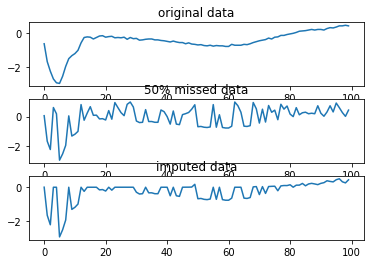


 78%|███████▊  | 781/1000 [00:47<00:13, 16.51it/s]

Iter: 790
Train_loss: 0.02456
Test_loss: 0.04135



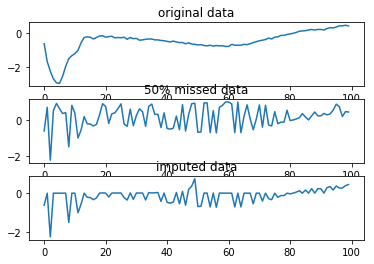


 79%|███████▉  | 791/1000 [00:48<00:12, 16.46it/s]

Iter: 800
Train_loss: 0.03346
Test_loss: 0.02947



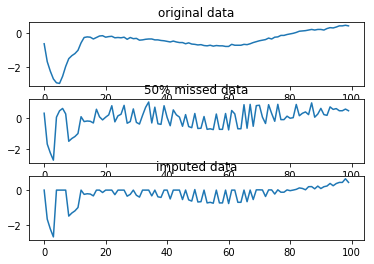


 80%|████████  | 801/1000 [00:48<00:12, 16.35it/s]

Iter: 810
Train_loss: 0.03053
Test_loss: 0.03632



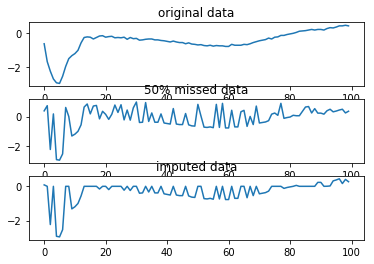


 81%|████████  | 811/1000 [00:49<00:11, 16.38it/s]

Iter: 820
Train_loss: 0.03047
Test_loss: 0.03521



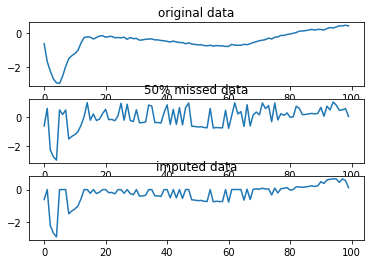


 82%|████████▏ | 821/1000 [00:50<00:10, 16.39it/s]

Iter: 830
Train_loss: 0.02698
Test_loss: 0.04519



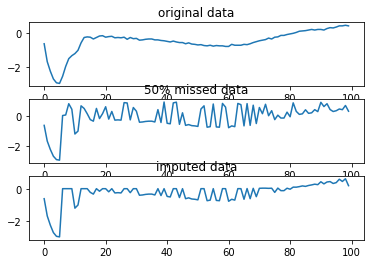


 83%|████████▎ | 831/1000 [00:50<00:10, 16.43it/s]

Iter: 840
Train_loss: 0.02942
Test_loss: 0.03855



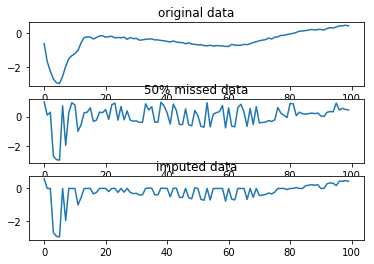


 84%|████████▍ | 841/1000 [00:51<00:09, 16.34it/s]

Iter: 850
Train_loss: 0.03157
Test_loss: 0.04597




 85%|████████▌ | 851/1000 [00:52<00:09, 16.33it/s]

Iter: 860
Train_loss: 0.02809
Test_loss: 0.04729



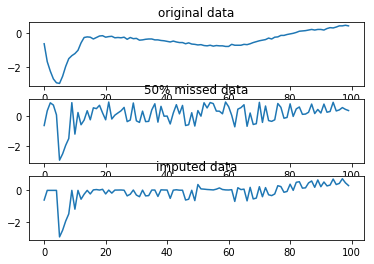


 86%|████████▌ | 861/1000 [00:52<00:08, 16.36it/s]

Iter: 870
Train_loss: 0.02745
Test_loss: 0.04825




 87%|████████▋ | 871/1000 [00:53<00:07, 16.37it/s]

Iter: 880
Train_loss: 0.02832
Test_loss: 0.03289




 88%|████████▊ | 881/1000 [00:53<00:07, 16.36it/s]

Iter: 890
Train_loss: 0.03424
Test_loss: 0.03483



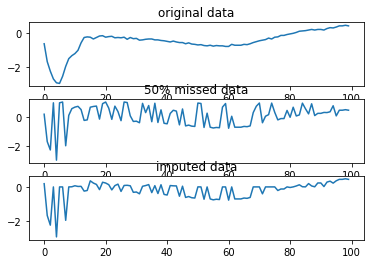


 89%|████████▉ | 891/1000 [00:54<00:06, 16.37it/s]

Iter: 900
Train_loss: 0.02917
Test_loss: 0.03893



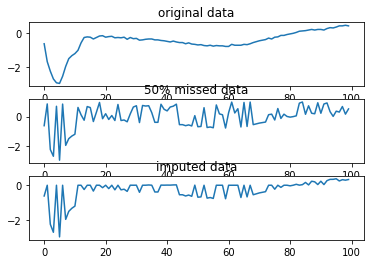


 90%|█████████ | 901/1000 [00:55<00:06, 16.32it/s]

Iter: 910
Train_loss: 0.03073
Test_loss: 0.03368



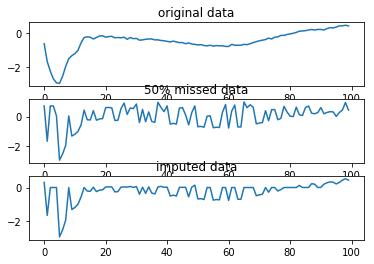


 91%|█████████ | 911/1000 [00:55<00:05, 16.32it/s]

Iter: 920
Train_loss: 0.03005
Test_loss: 0.03925




 92%|█████████▏| 921/1000 [00:56<00:04, 16.30it/s]

Iter: 930
Train_loss: 0.02928
Test_loss: 0.03071




 93%|█████████▎| 931/1000 [00:56<00:04, 16.33it/s]

Iter: 940
Train_loss: 0.02781
Test_loss: 0.03659




 94%|█████████▍| 941/1000 [00:57<00:03, 16.35it/s]

Iter: 950
Train_loss: 0.03533
Test_loss: 0.0419




 95%|█████████▌| 951/1000 [00:58<00:02, 16.37it/s]

Iter: 960
Train_loss: 0.02735
Test_loss: 0.03705



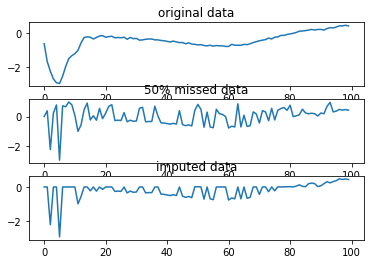


 96%|█████████▌| 961/1000 [00:58<00:02, 16.39it/s]

Iter: 970
Train_loss: 0.02407
Test_loss: 0.05459



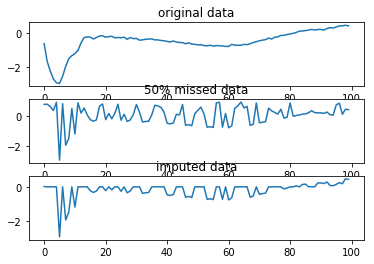


 97%|█████████▋| 971/1000 [00:59<00:01, 16.38it/s]

Iter: 980
Train_loss: 0.03296
Test_loss: 0.02891



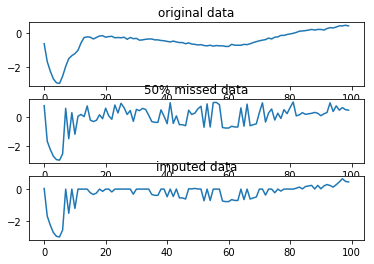


 98%|█████████▊| 981/1000 [01:00<00:01, 16.35it/s]

Iter: 990
Train_loss: 0.03252
Test_loss: 0.04044



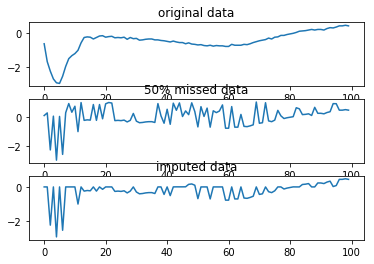


100%|██████████| 1000/1000 [01:00<00:00, 16.40it/s]

In [37]:
def plot(original, missed, imputed):
    fig = plt.figure(1)
    x = np.arange(120)
    plt.subplot(311)
    plt.plot(original)
    plt.title('original data')
    
    plt.subplot(312)
    plt.plot(missed)
    plt.title('50% missed data')
    
    plt.subplot(313)
    plt.plot(imputed)
    plt.title('imputed data')
    
        
    return fig
n_epochs = 1000
def reset_grad():
    for p in params:
        if p.grad is not None:
            data = p.grad.data
            p.grad = Variable(data.new().resize_as_(data).zero_())
            
G_solver = optim.Adam(G_params, lr=1e-2)
D_solver = optim.Adam(D_params, lr=1e-2)

def sample_Z(m, n):
    return np.random.uniform(0., 1., size = [m, n])        

# Mask Vector and Hint Vector Generation
def sample_M(m, n, p):
    A = np.random.uniform(0., 1., size = [m, n])
    B = A > p
    C = 1.*B
    return C
# make output file
if not os.path.exists('ECG_Impuation_output/'):
    os.makedirs('ECG_Impuation_output/')
i = 1
for it in tqdm(range(n_epochs)):
    data_loader.reset()
    data_original = np.array([])
    data_missed = np.array([])
    data_imputed = np.array([])
    while data_loader.has_next():
        X_mb,_ = data_loader.next_batch()
        
        data_original = np.append(data_original, X_mb[0])
        X_mb = Variable(torch.from_numpy(X_mb.astype('float32')))
        Z_mb = sample_Z(batch_size, Dim) 
        Z_mb = Variable(torch.from_numpy(Z_mb.astype('float32')))
        M_mb = sample_M(batch_size, Dim, p_miss)
        M_mb = Variable(torch.from_numpy(M_mb.astype('float32')))
        H_mb1 = sample_M(batch_size, Dim, 1-p_hint)
        H_mb1 = Variable(torch.from_numpy(H_mb1.astype('float32')))
        H_mb = M_mb * H_mb1

        New_X_mb = M_mb * X_mb + (1-M_mb) * Z_mb  # Missing Data Introduce
        data_missed = np.append(data_missed, New_X_mb[0])
        # Dicriminator forward-loss-backward-update
        G_sample = generator(X_mb,Z_mb,M_mb)
        D_sample = discriminator(X_mb, M_mb, G_sample, H_mb)
        D_loss = -torch.mean(M_mb * torch.log(D_sample + 1e-8) + (1-M_mb) * torch.log(1. - D_sample + 1e-8)) * 2
        D_loss.backward()
        D_solver.step()
        reset_grad()

        # Generator forward-loss-backward-update
        G_sample = generator(X_mb,Z_mb,M_mb)
        D_sample = discriminator(X_mb, M_mb, G_sample, H_mb)
        
        imputed = M_mb * X_mb + (1-M_mb) * G_sample
        imputed = imputed.detach().numpy()
        data_imputed = np.append(data_imputed, imputed[0])
        
        G_loss1 = -torch.mean((1-M_mb) * torch.log(D_sample + 1e-8)) / torch.mean(1-M_mb)
        MSE_train_loss = torch.mean((M_mb * X_mb - M_mb * G_sample)**2) / torch.mean(M_mb)
        MSE_test_loss = torch.mean(((1-M_mb) * X_mb - (1-M_mb)*G_sample)**2) / torch.mean(1-M_mb)
        G_loss = G_loss1  + alpha * MSE_train_loss 
        G_loss.backward()
        G_solver.step()
        reset_grad()
    
    # Print and Plot
    
 
    
        
    if it % 10 == 0:
        print('Iter: {}'.format(it))
        print('Train_loss: {:.4}'.format(MSE_train_loss))
        print('Test_loss: {:.4}'.format(MSE_test_loss))
        print()
        fig = plot(data_original,data_missed, data_imputed)
        plt.savefig('ECG_Impuation_output/'.format(str(i).zfill(3)), bbox_inches='tight')
        plt.show()
        i += 1
        plt.close(fig)
        



  0%|          | 0/1000 [00:00<?, ?it/s]

Iter: 0
Train_loss: 0.2945
Test_loss: 0.3143





  0%|          | 1/1000 [00:00<09:19,  1.79it/s]

Iter: 10
Train_loss: 0.2093
Test_loss: 0.226



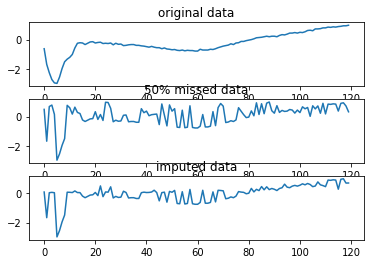



  1%|          | 11/1000 [00:01<01:46,  9.28it/s]

Iter: 20
Train_loss: 0.1688
Test_loss: 0.1861



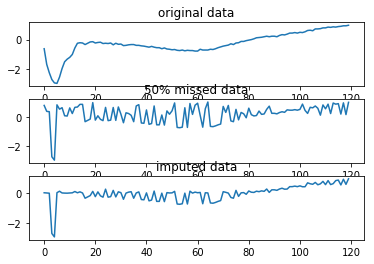



  2%|▏         | 21/1000 [00:01<01:29, 10.89it/s]

Iter: 30
Train_loss: 0.1296
Test_loss: 0.1536



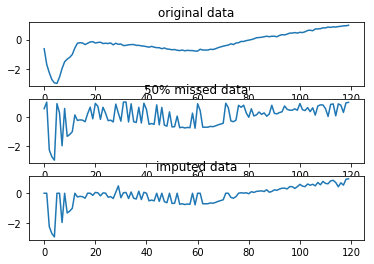



  3%|▎         | 31/1000 [00:02<01:25, 11.37it/s]

Iter: 40
Train_loss: 0.1118
Test_loss: 0.14



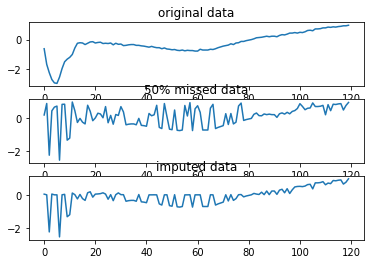



  4%|▍         | 41/1000 [00:03<01:17, 12.38it/s]

Iter: 50
Train_loss: 0.1214
Test_loss: 0.1092



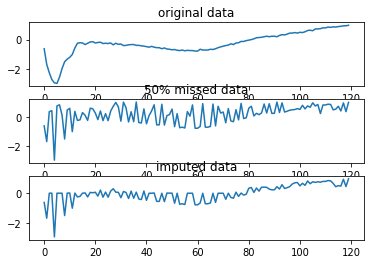



  5%|▌         | 51/1000 [00:03<01:14, 12.75it/s]

Iter: 60
Train_loss: 0.1169
Test_loss: 0.0951



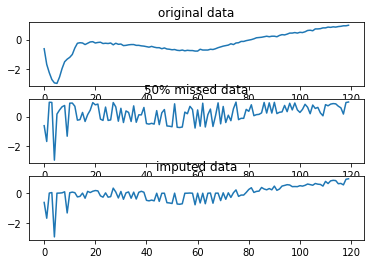



  6%|▌         | 61/1000 [00:04<01:12, 13.01it/s]

Iter: 70
Train_loss: 0.1047
Test_loss: 0.1064



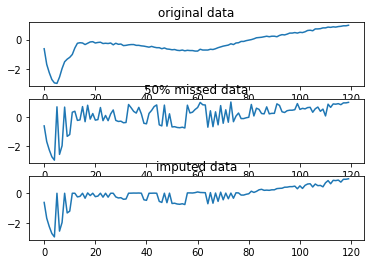



  7%|▋         | 71/1000 [00:05<01:08, 13.54it/s]

Iter: 80
Train_loss: 0.09497
Test_loss: 0.1096



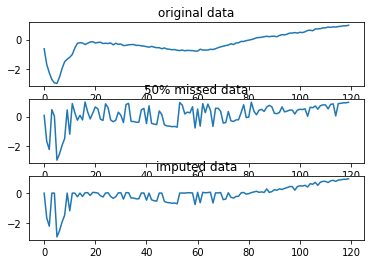



  8%|▊         | 81/1000 [00:05<01:05, 13.97it/s]

  9%|▉         | 90/1000 [00:05<00:59, 15.26it/s]

Iter: 90
Train_loss: 0.08511
Test_loss: 0.1345



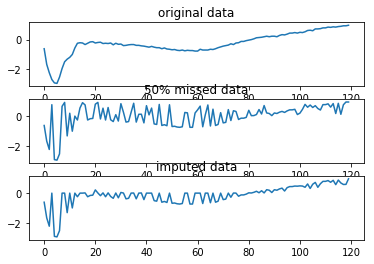



  9%|▉         | 94/1000 [00:06<01:03, 14.36it/s]

Iter: 100
Train_loss: 0.1032
Test_loss: 0.09099



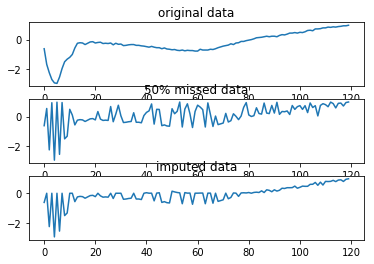



 10%|█         | 101/1000 [00:07<01:03, 14.07it/s]

 11%|█         | 110/1000 [00:07<00:58, 15.11it/s]

Iter: 110
Train_loss: 0.08421
Test_loss: 0.1115



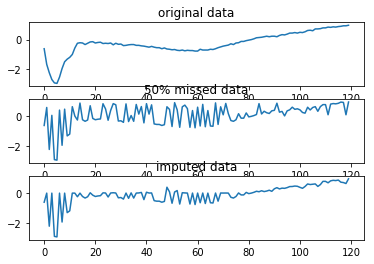



 12%|█▏        | 115/1000 [00:08<01:01, 14.37it/s]

Iter: 120
Train_loss: 0.0878
Test_loss: 0.1025



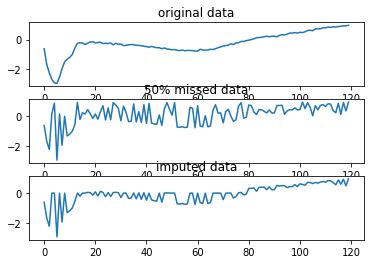



 12%|█▏        | 121/1000 [00:08<01:01, 14.22it/s]

Iter: 130
Train_loss: 0.102
Test_loss: 0.09973



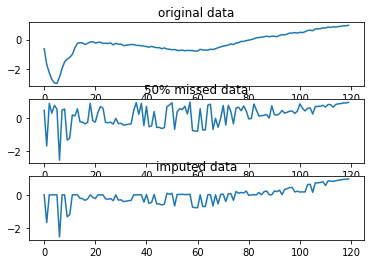



 13%|█▎        | 131/1000 [00:09<01:00, 14.41it/s]

Iter: 140
Train_loss: 0.07692
Test_loss: 0.1027



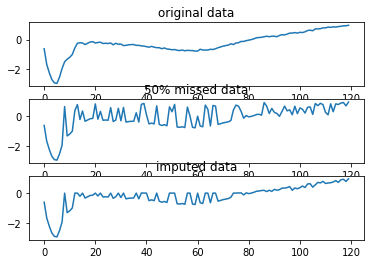



 14%|█▍        | 141/1000 [00:09<00:59, 14.35it/s]

Iter: 150
Train_loss: 0.08999
Test_loss: 0.1039



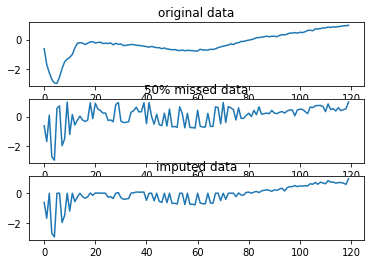



 15%|█▌        | 151/1000 [00:10<00:58, 14.46it/s]

Iter: 160
Train_loss: 0.08184
Test_loss: 0.111



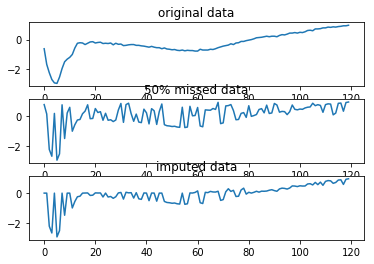



 16%|█▌        | 161/1000 [00:11<00:57, 14.49it/s]

Iter: 170
Train_loss: 0.08547
Test_loss: 0.1085



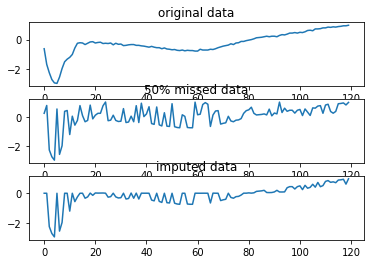



 17%|█▋        | 171/1000 [00:11<00:56, 14.68it/s]

Iter: 180
Train_loss: 0.09681
Test_loss: 0.08314



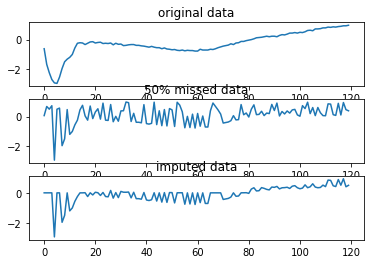



 18%|█▊        | 181/1000 [00:12<00:56, 14.53it/s]

Iter: 190
Train_loss: 0.0718
Test_loss: 0.1135



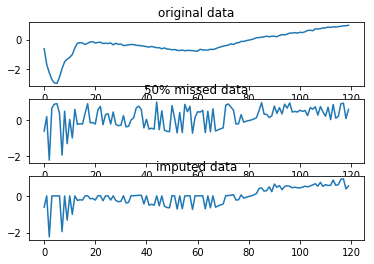



 19%|█▉        | 191/1000 [00:12<00:55, 14.69it/s]

Iter: 200
Train_loss: 0.09622
Test_loss: 0.08868



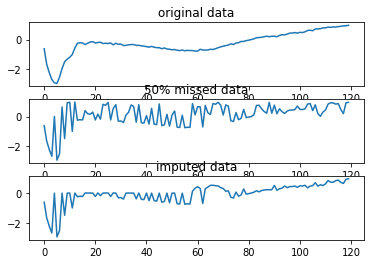



 20%|██        | 201/1000 [00:13<00:53, 14.82it/s]

Iter: 210
Train_loss: 0.0846
Test_loss: 0.09269



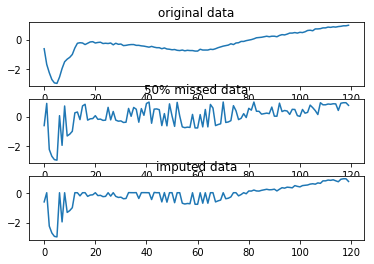



 21%|██        | 211/1000 [00:14<00:53, 14.81it/s]

Iter: 220
Train_loss: 0.07888
Test_loss: 0.104



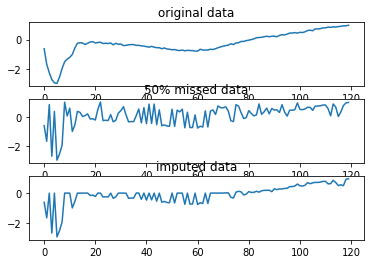



 22%|██▏       | 221/1000 [00:14<00:52, 14.83it/s]

Iter: 230
Train_loss: 0.07716
Test_loss: 0.09894



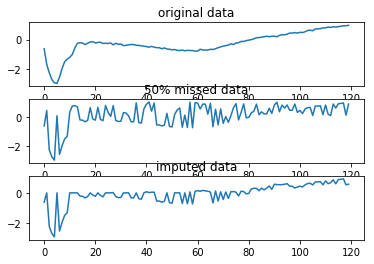



 23%|██▎       | 231/1000 [00:15<00:52, 14.70it/s]

Iter: 240
Train_loss: 0.09194
Test_loss: 0.08399





 24%|██▍       | 241/1000 [00:16<00:51, 14.77it/s]

Iter: 250
Train_loss: 0.08483
Test_loss: 0.08366



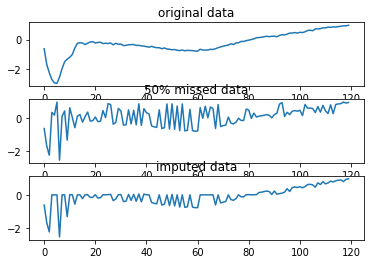



 25%|██▌       | 251/1000 [00:16<00:50, 14.78it/s]

Iter: 260
Train_loss: 0.09142
Test_loss: 0.07576





 26%|██▌       | 261/1000 [00:17<00:50, 14.67it/s]

Iter: 270
Train_loss: 0.0697
Test_loss: 0.09524





 27%|██▋       | 271/1000 [00:18<00:49, 14.73it/s]

Iter: 280
Train_loss: 0.07964
Test_loss: 0.09488



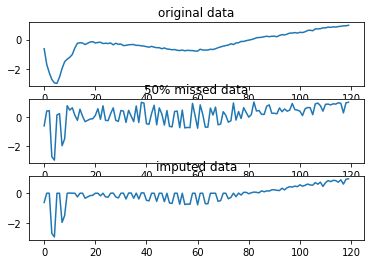



 28%|██▊       | 281/1000 [00:19<00:48, 14.74it/s]

Iter: 290
Train_loss: 0.07738
Test_loss: 0.09338



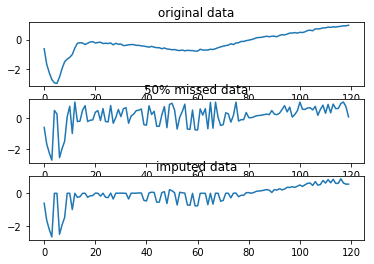



 29%|██▉       | 291/1000 [00:19<00:47, 14.81it/s]

Iter: 300
Train_loss: 0.08869
Test_loss: 0.1171





 30%|███       | 301/1000 [00:20<00:47, 14.84it/s]

Iter: 310
Train_loss: 0.07992
Test_loss: 0.08481



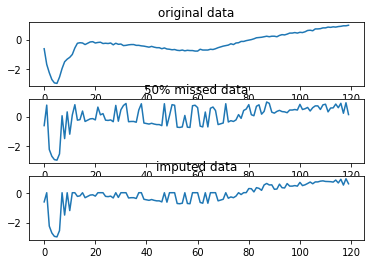



 31%|███       | 311/1000 [00:20<00:46, 14.85it/s]

Iter: 320
Train_loss: 0.07909
Test_loss: 0.1035



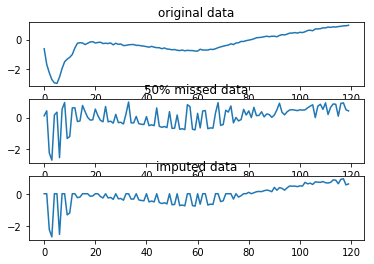



 32%|███▏      | 321/1000 [00:21<00:45, 14.92it/s]

Iter: 330
Train_loss: 0.09405
Test_loss: 0.08522



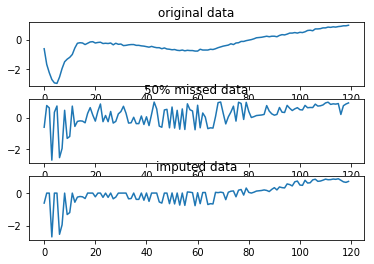



 33%|███▎      | 331/1000 [00:22<00:44, 14.98it/s]

Iter: 340
Train_loss: 0.07536
Test_loss: 0.09567





 34%|███▍      | 341/1000 [00:22<00:44, 14.93it/s]

Iter: 350
Train_loss: 0.09397
Test_loss: 0.09311





 35%|███▌      | 351/1000 [00:23<00:43, 15.00it/s]

Iter: 360
Train_loss: 0.0755
Test_loss: 0.09569



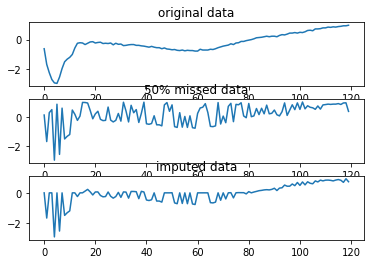



 36%|███▌      | 361/1000 [00:23<00:42, 15.07it/s]

Iter: 370
Train_loss: 0.06656
Test_loss: 0.1121



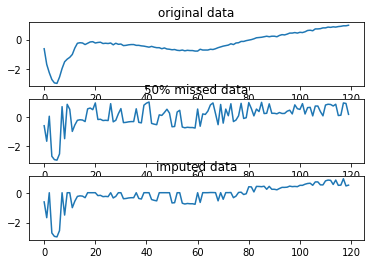



 37%|███▋      | 371/1000 [00:24<00:41, 15.07it/s]

Iter: 380
Train_loss: 0.07341
Test_loss: 0.08592



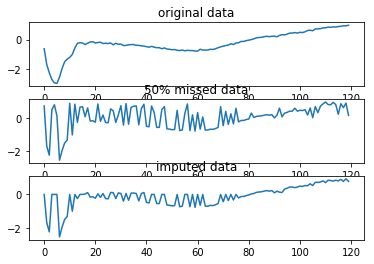



 38%|███▊      | 381/1000 [00:25<00:40, 15.14it/s]

Iter: 390
Train_loss: 0.07472
Test_loss: 0.09933



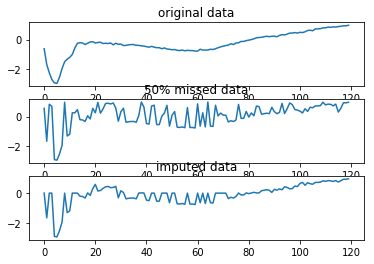



 39%|███▉      | 391/1000 [00:25<00:40, 15.07it/s]

Iter: 400
Train_loss: 0.07652
Test_loss: 0.0845



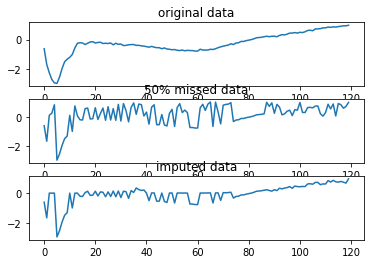



 40%|████      | 401/1000 [00:26<00:39, 15.14it/s]

Iter: 410
Train_loss: 0.07392
Test_loss: 0.1015



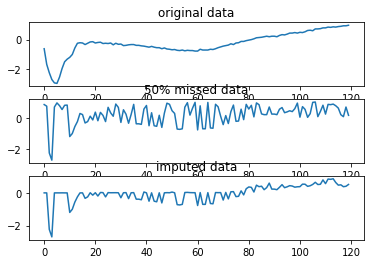



 41%|████      | 411/1000 [00:27<00:38, 15.14it/s]

Iter: 420
Train_loss: 0.07492
Test_loss: 0.09198





 42%|████▏     | 421/1000 [00:27<00:38, 15.09it/s]

Iter: 430
Train_loss: 0.07988
Test_loss: 0.08923



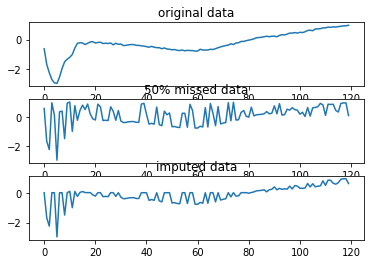



 43%|████▎     | 431/1000 [00:28<00:37, 15.09it/s]

Iter: 440
Train_loss: 0.1003
Test_loss: 0.07903





 44%|████▍     | 441/1000 [00:29<00:37, 15.08it/s]

Iter: 450
Train_loss: 0.07296
Test_loss: 0.09397





 45%|████▌     | 451/1000 [00:29<00:36, 15.13it/s]

Iter: 460
Train_loss: 0.08334
Test_loss: 0.07942



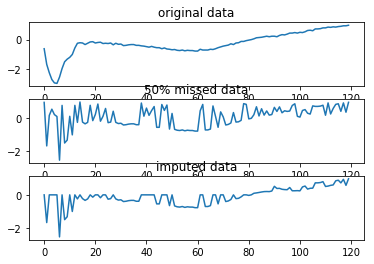



 46%|████▌     | 461/1000 [00:30<00:35, 15.15it/s]

Iter: 470
Train_loss: 0.09402
Test_loss: 0.07126





 47%|████▋     | 471/1000 [00:31<00:34, 15.19it/s]

Iter: 480
Train_loss: 0.07553
Test_loss: 0.0911





 48%|████▊     | 481/1000 [00:31<00:34, 15.12it/s]

Iter: 490
Train_loss: 0.08223
Test_loss: 0.08569





 49%|████▉     | 491/1000 [00:32<00:33, 15.17it/s]

Iter: 500
Train_loss: 0.09331
Test_loss: 0.07769





 50%|█████     | 501/1000 [00:33<00:32, 15.18it/s]

 51%|█████     | 509/1000 [00:33<00:31, 15.37it/s]

Iter: 510
Train_loss: 0.08716
Test_loss: 0.08549



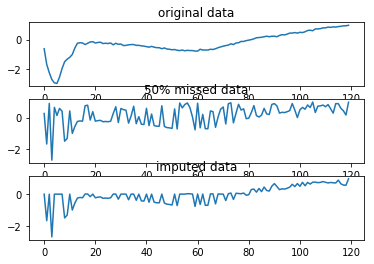



 51%|█████▏    | 513/1000 [00:33<00:32, 15.21it/s]

Iter: 520
Train_loss: 0.08213
Test_loss: 0.07908



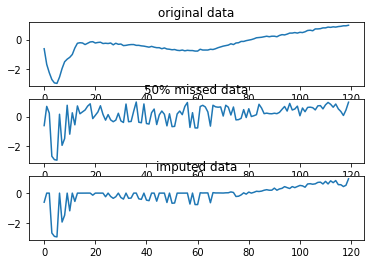



 52%|█████▏    | 521/1000 [00:34<00:31, 15.16it/s]

Iter: 530
Train_loss: 0.07698
Test_loss: 0.09263



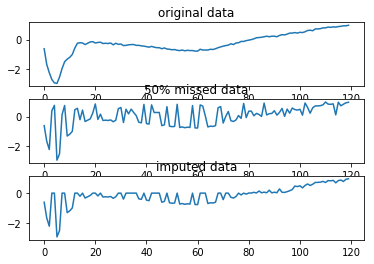



 53%|█████▎    | 531/1000 [00:34<00:30, 15.21it/s]

Iter: 540
Train_loss: 0.08503
Test_loss: 0.08165



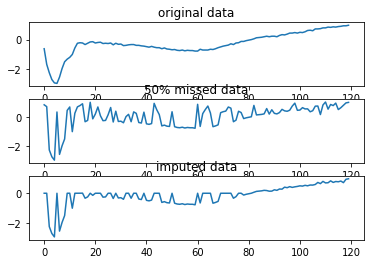



 54%|█████▍    | 541/1000 [00:35<00:30, 15.25it/s]

Iter: 550
Train_loss: 0.08616
Test_loss: 0.09369



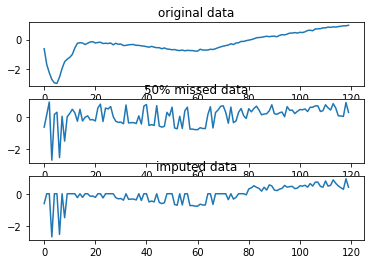



 55%|█████▌    | 551/1000 [00:36<00:29, 15.30it/s]

Iter: 560
Train_loss: 0.08091
Test_loss: 0.09059



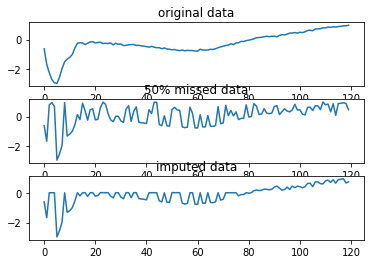



 56%|█████▌    | 561/1000 [00:36<00:28, 15.34it/s]

Iter: 570
Train_loss: 0.06459
Test_loss: 0.09656



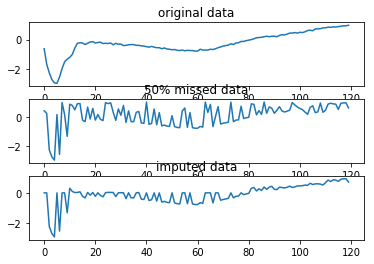



 57%|█████▋    | 571/1000 [00:37<00:27, 15.39it/s]

 58%|█████▊    | 580/1000 [00:37<00:26, 15.59it/s]

Iter: 580
Train_loss: 0.08473
Test_loss: 0.09396



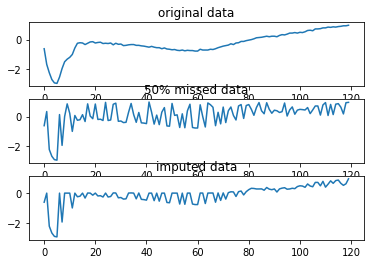



 58%|█████▊    | 584/1000 [00:37<00:26, 15.41it/s]

Iter: 590
Train_loss: 0.07533
Test_loss: 0.08815





 59%|█████▉    | 591/1000 [00:38<00:26, 15.36it/s]

Iter: 600
Train_loss: 0.07754
Test_loss: 0.09352



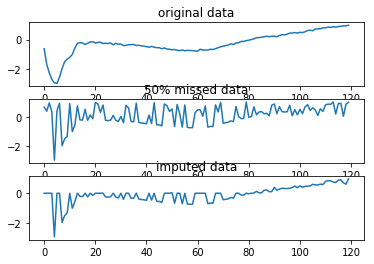



 60%|██████    | 601/1000 [00:39<00:25, 15.40it/s]

Iter: 610
Train_loss: 0.07572
Test_loss: 0.09108



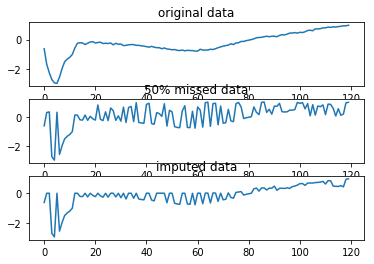



 61%|██████    | 611/1000 [00:39<00:25, 15.36it/s]

Iter: 620
Train_loss: 0.08179
Test_loss: 0.1065



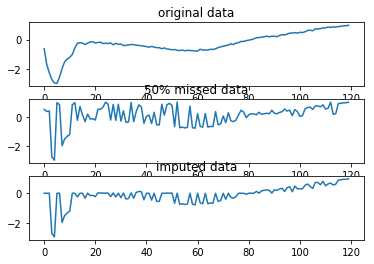



 62%|██████▏   | 621/1000 [00:40<00:24, 15.38it/s]

Iter: 630
Train_loss: 0.07041
Test_loss: 0.1014





 63%|██████▎   | 631/1000 [00:41<00:24, 15.35it/s]

Iter: 640
Train_loss: 0.08156
Test_loss: 0.07413



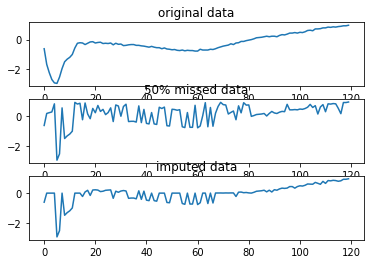



 64%|██████▍   | 641/1000 [00:41<00:23, 15.35it/s]

Iter: 650
Train_loss: 0.07122
Test_loss: 0.1027



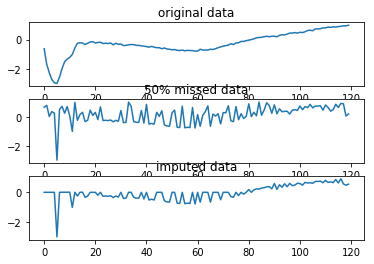



 65%|██████▌   | 651/1000 [00:42<00:22, 15.36it/s]

Iter: 660
Train_loss: 0.07292
Test_loss: 0.1068





 66%|██████▌   | 661/1000 [00:43<00:22, 15.36it/s]

Iter: 670
Train_loss: 0.08054
Test_loss: 0.07695



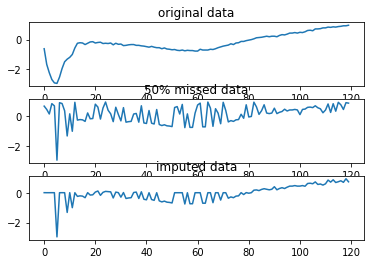



 67%|██████▋   | 671/1000 [00:43<00:21, 15.35it/s]

Iter: 680
Train_loss: 0.08209
Test_loss: 0.07974



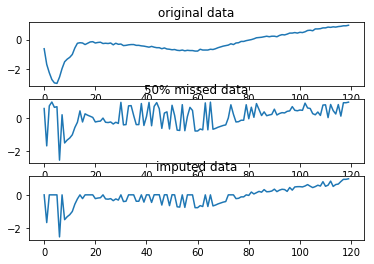



 68%|██████▊   | 681/1000 [00:44<00:20, 15.38it/s]

Iter: 690
Train_loss: 0.07741
Test_loss: 0.08701



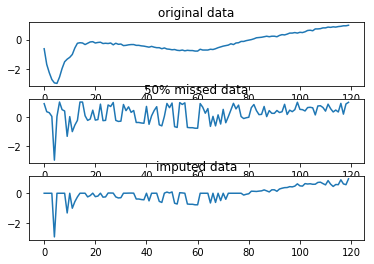



 69%|██████▉   | 691/1000 [00:44<00:20, 15.41it/s]

Iter: 700
Train_loss: 0.08347
Test_loss: 0.08491



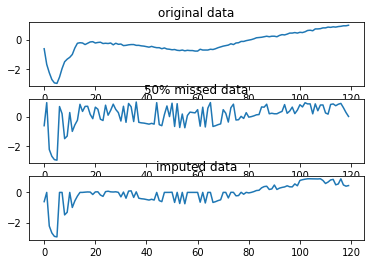



 70%|███████   | 701/1000 [00:45<00:19, 15.42it/s]

Iter: 710
Train_loss: 0.07368
Test_loss: 0.09183



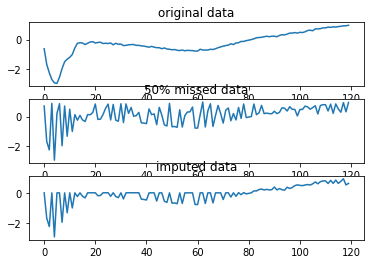



 71%|███████   | 711/1000 [00:46<00:18, 15.45it/s]

Iter: 720
Train_loss: 0.07857
Test_loss: 0.1076



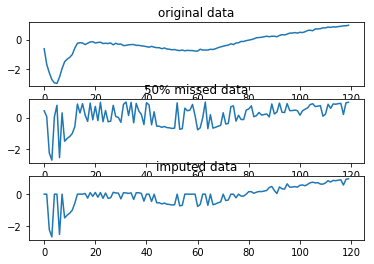



 72%|███████▏  | 721/1000 [00:46<00:18, 15.47it/s]

Iter: 730
Train_loss: 0.07544
Test_loss: 0.08639



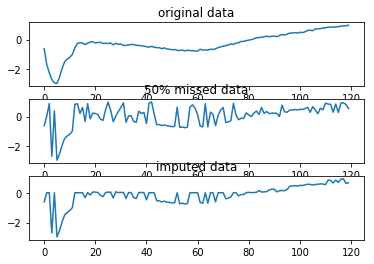



 73%|███████▎  | 731/1000 [00:47<00:17, 15.47it/s]

Iter: 740
Train_loss: 0.09045
Test_loss: 0.09243



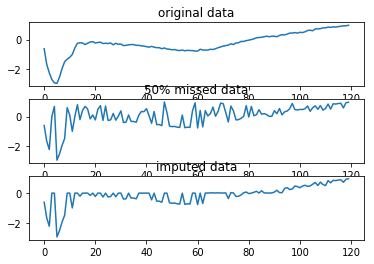



 74%|███████▍  | 741/1000 [00:47<00:16, 15.46it/s]

Iter: 750
Train_loss: 0.074
Test_loss: 0.1024



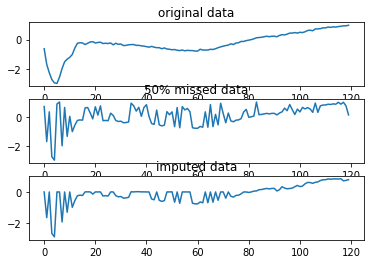



 75%|███████▌  | 751/1000 [00:48<00:16, 15.49it/s]

Iter: 760
Train_loss: 0.08423
Test_loss: 0.09083



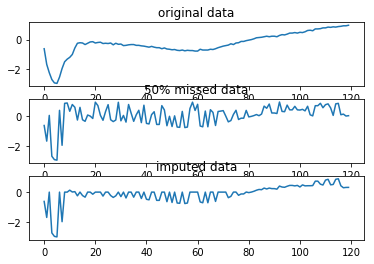



 76%|███████▌  | 761/1000 [00:49<00:15, 15.49it/s]

Iter: 770
Train_loss: 0.0767
Test_loss: 0.0887



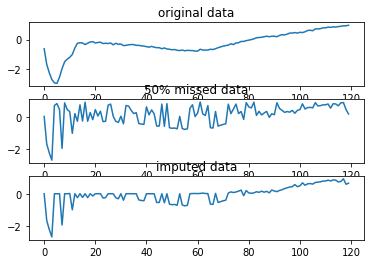



 77%|███████▋  | 771/1000 [00:49<00:14, 15.50it/s]

Iter: 780
Train_loss: 0.08359
Test_loss: 0.086



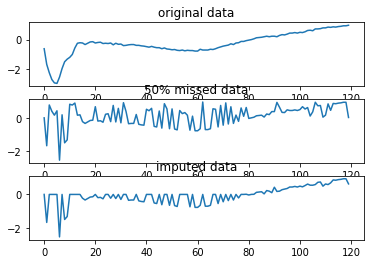



 78%|███████▊  | 781/1000 [00:50<00:14, 15.52it/s]

Iter: 790
Train_loss: 0.07891
Test_loss: 0.09472





 79%|███████▉  | 791/1000 [00:50<00:13, 15.52it/s]

Iter: 800
Train_loss: 0.0715
Test_loss: 0.09752



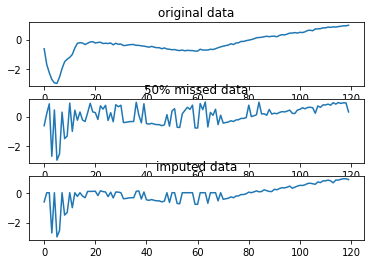



 80%|████████  | 801/1000 [00:51<00:12, 15.54it/s]

Iter: 810
Train_loss: 0.08357
Test_loss: 0.1023



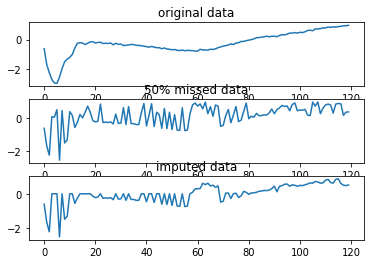



 81%|████████  | 811/1000 [00:52<00:12, 15.56it/s]

Iter: 820
Train_loss: 0.07357
Test_loss: 0.09453



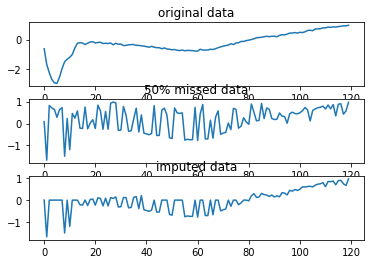



 82%|████████▏ | 821/1000 [00:52<00:11, 15.52it/s]

Iter: 830
Train_loss: 0.07773
Test_loss: 0.08552



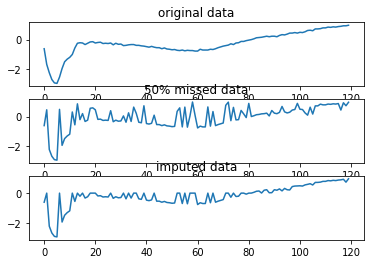



 83%|████████▎ | 831/1000 [00:53<00:10, 15.54it/s]

Iter: 840
Train_loss: 0.07603
Test_loss: 0.09288



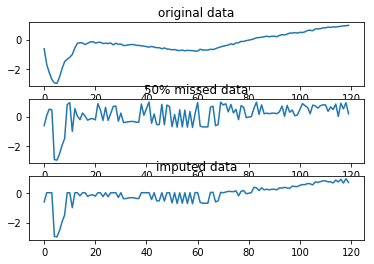



 84%|████████▍ | 841/1000 [00:54<00:10, 15.53it/s]

Iter: 850
Train_loss: 0.08277
Test_loss: 0.08971



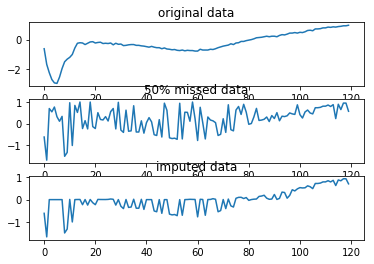



 85%|████████▌ | 851/1000 [00:54<00:09, 15.55it/s]

Iter: 860
Train_loss: 0.08337
Test_loss: 0.07516



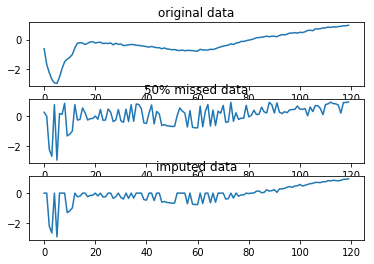



 86%|████████▌ | 861/1000 [00:55<00:08, 15.57it/s]

 87%|████████▋ | 870/1000 [00:55<00:08, 15.70it/s]

Iter: 870
Train_loss: 0.06602
Test_loss: 0.0907



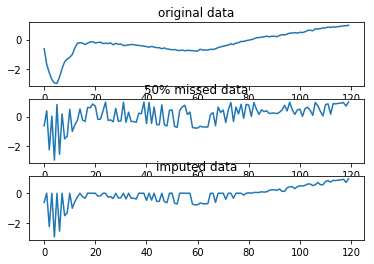



 87%|████████▋ | 874/1000 [00:55<00:08, 15.62it/s]

Iter: 880
Train_loss: 0.07668
Test_loss: 0.09001



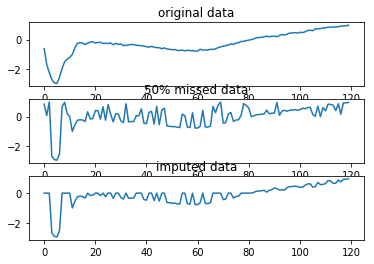



 88%|████████▊ | 881/1000 [00:56<00:07, 15.59it/s]

Iter: 890
Train_loss: 0.07559
Test_loss: 0.1012



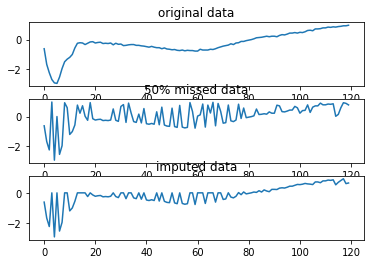



 89%|████████▉ | 891/1000 [00:57<00:06, 15.58it/s]

Iter: 900
Train_loss: 0.07866
Test_loss: 0.08628





 90%|█████████ | 901/1000 [00:57<00:06, 15.58it/s]

Iter: 910
Train_loss: 0.07132
Test_loss: 0.08617





 91%|█████████ | 911/1000 [00:58<00:05, 15.57it/s]

Iter: 920
Train_loss: 0.08121
Test_loss: 0.09563





 92%|█████████▏| 921/1000 [00:59<00:05, 15.58it/s]

Iter: 930
Train_loss: 0.07401
Test_loss: 0.09187





 93%|█████████▎| 931/1000 [00:59<00:04, 15.58it/s]

Iter: 940
Train_loss: 0.07488
Test_loss: 0.09397





 94%|█████████▍| 941/1000 [01:00<00:03, 15.60it/s]

Iter: 950
Train_loss: 0.07852
Test_loss: 0.08471



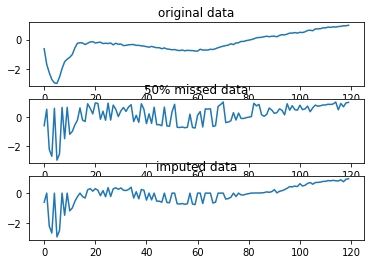



 95%|█████████▌| 951/1000 [01:01<00:03, 15.59it/s]

Iter: 960
Train_loss: 0.0821
Test_loss: 0.08524





 96%|█████████▌| 961/1000 [01:01<00:02, 15.59it/s]

Iter: 970
Train_loss: 0.07216
Test_loss: 0.08932



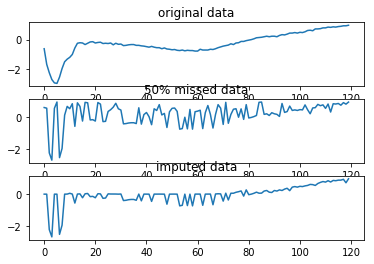



 97%|█████████▋| 971/1000 [01:02<00:01, 15.61it/s]

Iter: 980
Train_loss: 0.07706
Test_loss: 0.1001



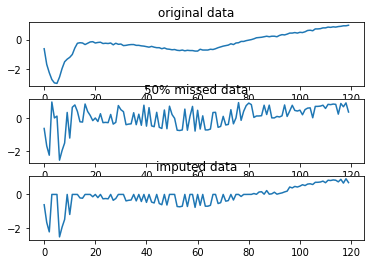



 98%|█████████▊| 981/1000 [01:02<00:01, 15.58it/s]

Iter: 990
Train_loss: 0.07361
Test_loss: 0.1089



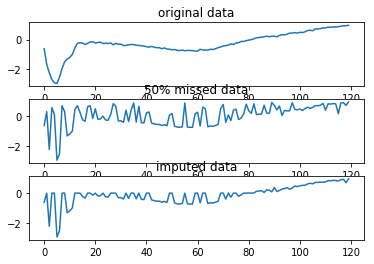



 99%|█████████▉| 991/1000 [01:03<00:00, 15.60it/s]

100%|██████████| 1000/1000 [01:03<00:00, 15.73it/s]

In [67]:
def plot(original, missed, imputed):
    fig = plt.figure(1)
    x = np.arange(120)
    plt.subplot(311)
    plt.plot(original)
    plt.title('original data')
    
    plt.subplot(312)
    plt.plot(missed)
    plt.title('50% missed data')
    
    plt.subplot(313)
    plt.plot(imputed)
    plt.title('imputed data')
    
        
    return fig
n_epochs = 1000
def reset_grad():
    for p in params:
        if p.grad is not None:
            data = p.grad.data
            p.grad = Variable(data.new().resize_as_(data).zero_())
            
G_solver = optim.Adam(G_params, lr=1e-2)
D_solver = optim.Adam(D_params, lr=1e-2)

def sample_Z(m, n):
    return np.random.uniform(0., 1., size = [m, n])        

# Mask Vector and Hint Vector Generation
def sample_M(m, n, p):
    A = np.random.uniform(0., 1., size = [m, n])
    B = A > p
    C = 1.*B
    return C
# make output file
if not os.path.exists('ECG_Impuation_output/'):
    os.makedirs('ECG_Impuation_output/')
i = 1
for it in tqdm(range(n_epochs)):
    data_loader.reset()
    data_original = np.array([])
    data_missed = np.array([])
    data_imputed = np.array([])
    while data_loader.has_next():
        X_mb,_ = data_loader.next_batch()
        
        data_original = np.append(data_original, X_mb[0])
        X_mb = Variable(torch.from_numpy(X_mb.astype('float32')))
        Z_mb = sample_Z(batch_size, Dim) 
        Z_mb = Variable(torch.from_numpy(Z_mb.astype('float32')))
        M_mb = sample_M(batch_size, Dim, p_miss)
        M_mb = Variable(torch.from_numpy(M_mb.astype('float32')))
        H_mb1 = sample_M(batch_size, Dim, 1-p_hint)
        H_mb1 = Variable(torch.from_numpy(H_mb1.astype('float32')))
        H_mb = M_mb * H_mb1

        New_X_mb = M_mb * X_mb + (1-M_mb) * Z_mb  # Missing Data Introduce
        data_missed = np.append(data_missed, New_X_mb[0])
        # Dicriminator forward-loss-backward-update
        G_sample = generator(X_mb,Z_mb,M_mb)
        D_sample = discriminator(X_mb, M_mb, G_sample, H_mb)
        D_loss = -torch.mean(M_mb * torch.log(D_sample + 1e-8) + (1-M_mb) * torch.log(1. - D_sample + 1e-8)) * 2
        D_loss.backward()
        D_solver.step()
        reset_grad()

        # Generator forward-loss-backward-update
        G_sample = generator(X_mb,Z_mb,M_mb)
        D_sample = discriminator(X_mb, M_mb, G_sample, H_mb)
        
        imputed = M_mb * X_mb + (1-M_mb) * G_sample
        imputed = imputed.detach().numpy()
        data_imputed = np.append(data_imputed, imputed[0])
        
        G_loss1 = -torch.mean((1-M_mb) * torch.log(D_sample + 1e-8)) / torch.mean(1-M_mb)
        MSE_train_loss = torch.mean((M_mb * X_mb - M_mb * G_sample)**2) / torch.mean(M_mb)
        MSE_test_loss = torch.mean(((1-M_mb) * X_mb - (1-M_mb)*G_sample)**2) / torch.mean(1-M_mb)
        G_loss = G_loss1  + alpha * MSE_train_loss 
        G_loss.backward()
        G_solver.step()
        reset_grad()
    
    # Print and Plot
    
 
    
        
    if it % 10 == 0:
        print('Iter: {}'.format(it))
        print('Train_loss: {:.4}'.format(MSE_train_loss))
        print('Test_loss: {:.4}'.format(MSE_test_loss))
        print()
        fig = plot(data_original,data_missed, data_imputed)
        plt.savefig('ECG_Impuation_output/'.format(str(i).zfill(3)), bbox_inches='tight')
        plt.show()
        i += 1
        plt.close(fig)
        